In [2]:
import pandas as pd

# data gotten from https://www.worldometers.info/world-population/south-korea-population/
korean_population=51343545   # Friday, March 11, 2022

# data for this is gotten from: https://sites.google.com/view/snuaric/data-service/covid-19/covid-19-data?authuser=0
df_columns_to_keep = [ "DATE", "CONFIRM", "RELEASE", "QUARANT", "DEATH"]
df=pd.read_excel('Korea_dataset.xlsx',usecols=df_columns_to_keep)



#Please not that I need daily numbers, but the dataset has following attributes:
#Confirmed: cummulative
#RELEASE: cummulative
#death: cummulative
# quarantined: possibly cummulative (i cant judge)


# Sort data by date in ascending order
df=df.sort_values(by=['DATE'], ascending=True)
# df=df[1:len(df)]
df.tail(25)


# print (df["DATE"].min())
# print (df["DATE"].max())

# check if there are any missing dates for which data is not recorded. If so, then print them
df_new = df.set_index('DATE')
pd.date_range(start = '2020-01-20', end = '2022-03-11' ).difference(df_new.index)


import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure



#Cummulative numbers
infected_cum=df[['CONFIRM']][0:df.index.max()-200-30-4].to_numpy()
quarantined_cum=df[['QUARANT']][0:df.index.max()-200-30-4].to_numpy()
deceased_cum=df[['DEATH']][0:df.index.max()-200-30-4].to_numpy()
recovered_cum=df[['RELEASE']][0:df.index.max()-200-30-4].to_numpy()


#Daily numbers
infected=infected_cum[1:len(infected_cum)]-infected_cum[0:len(infected_cum)-1]
quarantined=quarantined_cum[0:len(infected_cum)-1]
deceased=deceased_cum[1:len(deceased_cum)]-deceased_cum[0:len(deceased_cum)-1]
recovered=recovered_cum[1:len(recovered_cum)]-recovered_cum[0:len(recovered_cum)-1]


oner=np.ones((len(infected),1))
residual=infected+quarantined+deceased+recovered
susceptible=korean_population*oner-residual

inter_df= df[0:df.index.max()-200-30-4-1]
dates=inter_df["DATE"].tolist()

# Add histogram data
S=np.squeeze(susceptible).astype(float)
I=np.squeeze(infected).astype(float)
Q=np.squeeze(quarantined).astype(float)
R=np.squeeze(recovered).astype(float)
D=np.squeeze(deceased).astype(float)



df = pd.DataFrame({'DATE': dates, 'Susceptible': S, 'Infected': I, 'Quarantined': Q, 'Recovered': R, 'Deceased': D})
df['day'] = df['DATE'].map(lambda x: x.day)
df['month'] = df['DATE'].map(lambda x: x.month)
df['year'] = df['DATE'].map(lambda x: x.year)
df['days'] = df.index.tolist()

# for i in range(len(df)):
#     if df['year'][i]==2021 and df['year'][i-1]==2020:
#         take_note=df['days'][i]
#     if df['year'][i]==2021:
#         df['days'][i]=df['days'][i]-take_note

#     if df['year'][i]==2022 and df['year'][i-1]==2021:
#         take_note2=df['days'][i]
#     if df['year'][i]==2022:
#         df['days'][i]=df['days'][i]-take_note2
    







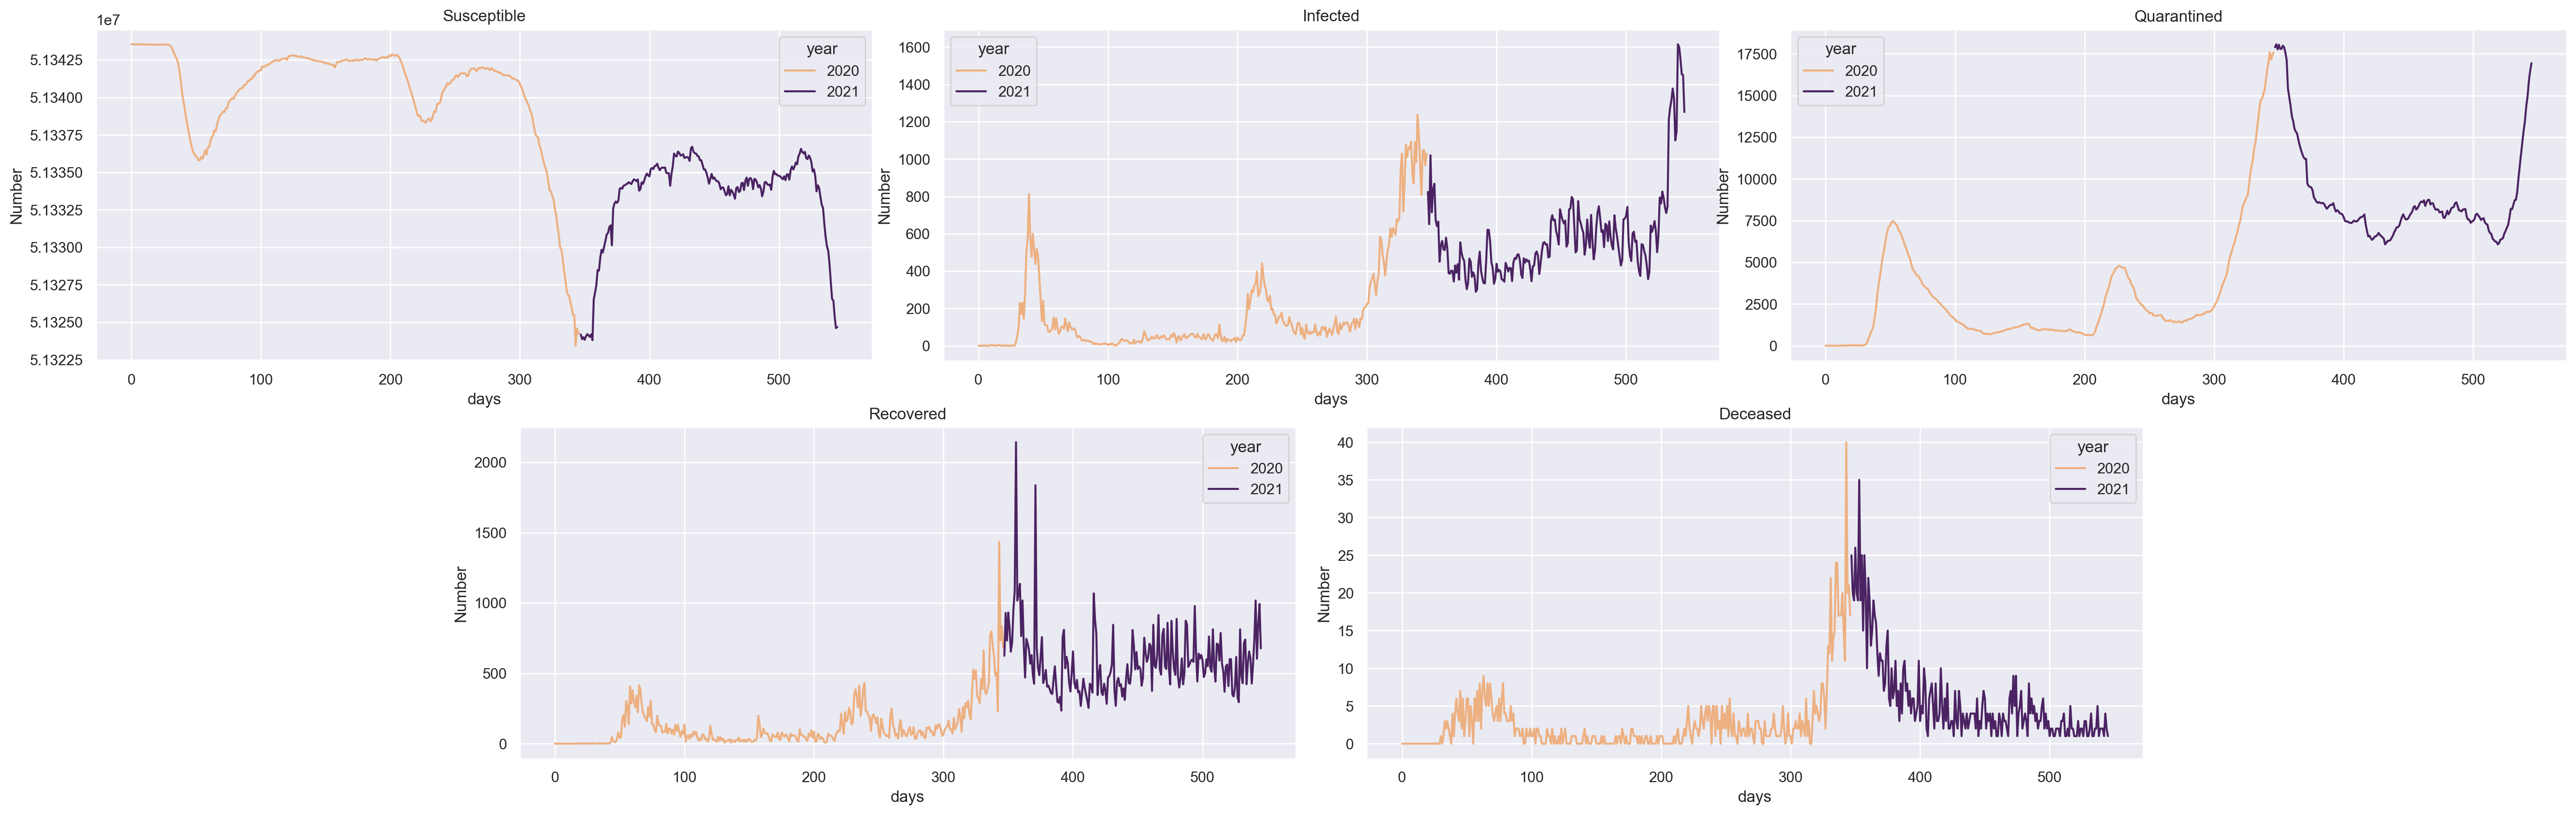

In [18]:
from tkinter import font
from matplotlib import pyplot
pyplot.figure(figsize=(33, 10),dpi=200) # width and height in inches
import seaborn as sns

sns.set(style="darkgrid")

ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)


g1=sns.lineplot(data=df, x="days", y="Susceptible",hue="year",palette="flare", ax=ax1)
# g1.set(xticklabels=[])
# g1.set(title='User-Type (0=Non-Subscriber, 1=Subscriber)')
g1.set(ylabel='Number')
g1.set(title="Susceptible")
g2=sns.lineplot(data=df, x="days", y="Infected", hue="year",palette="flare", ax=ax2)
g2.set(ylabel='Number')
g2.set(title="Infected")
g3=sns.lineplot(data=df, x="days", y="Quarantined", hue="year",palette="flare", ax=ax3)
g3.set(ylabel='Number')
g3.set(title="Quarantined")
g4=sns.lineplot(data=df, x="days", y="Recovered", hue="year",palette="flare", ax=ax4)
g4.set(ylabel='Number')
g4.set(title="Recovered")
g5=sns.lineplot(data=df, x="days", y="Deceased", hue="year",palette="flare", ax=ax5)
g5.set(ylabel='Number')
g5.set(title="Deceased")
plt.show()